# 1. Importer les packages

In [407]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import itertools
from sklearn.cluster import KMeans
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2. Importer les données

In [408]:
product = pd.read_csv("/kaggle/input/products/olist_products_dataset.csv") 
customers = pd.read_csv("/kaggle/input/customers/olist_customers_dataset.csv") 
geolocation = pd.read_csv("/kaggle/input/geolocation/olist_geolocation_dataset.csv") 
o_payments = pd.read_csv("/kaggle/input/payments/olist_order_payments_dataset.csv") 
o_reviews = pd.read_csv("/kaggle/input/reviews/olist_order_reviews_dataset.csv") 
dataset = pd.read_csv("/kaggle/input/orders-dataset/olist_orders_dataset.csv")
items = pd.read_csv("/kaggle/input/order-items/olist_order_items_dataset.csv") 
# reviews = pd.read_csv("/kaggle/input/reviews/olist_order_reviews_dataset.csv") 
NameTranslation = pd.read_csv("/kaggle/input/NameTranslation/product_category_name_translation (1).csv")
sellers = pd.read_csv("/kaggle/input/sellers1/olist_sellers_dataset (1).csv")

# Add all the DF together 

In [409]:
# replace the product categorie names to english
products = pd.read_csv("/kaggle/input/products/olist_products_dataset.csv") 
prod_cat_name_tr = pd.read_csv("/kaggle/input/NameTranslation/product_category_name_translation (1).csv")
products = products.merge(prod_cat_name_tr, on='product_category_name', how='left')
products.drop ('product_category_name', axis=1, inplace=True)

In [410]:
#list dataframe you want to append
df = dataset.merge(items, on='order_id', how='left')
df = df.merge(o_payments, on='order_id', how='outer', validate='m:m')
df = df.merge(o_reviews, on='order_id', how='outer')
df = df.merge(product, on='product_id', how='outer')
df = df.merge(customers, on='customer_id', how='outer')
df = df.merge(sellers, on='seller_id', how='outer')
df = df.merge(geolocation, how='inner', left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix').drop_duplicates('customer_id', keep='first')

In [411]:
# # generate a report
# pandas_profiling.ProfileReport(pd.read_csv())

In [412]:
df.shape

(99163, 44)

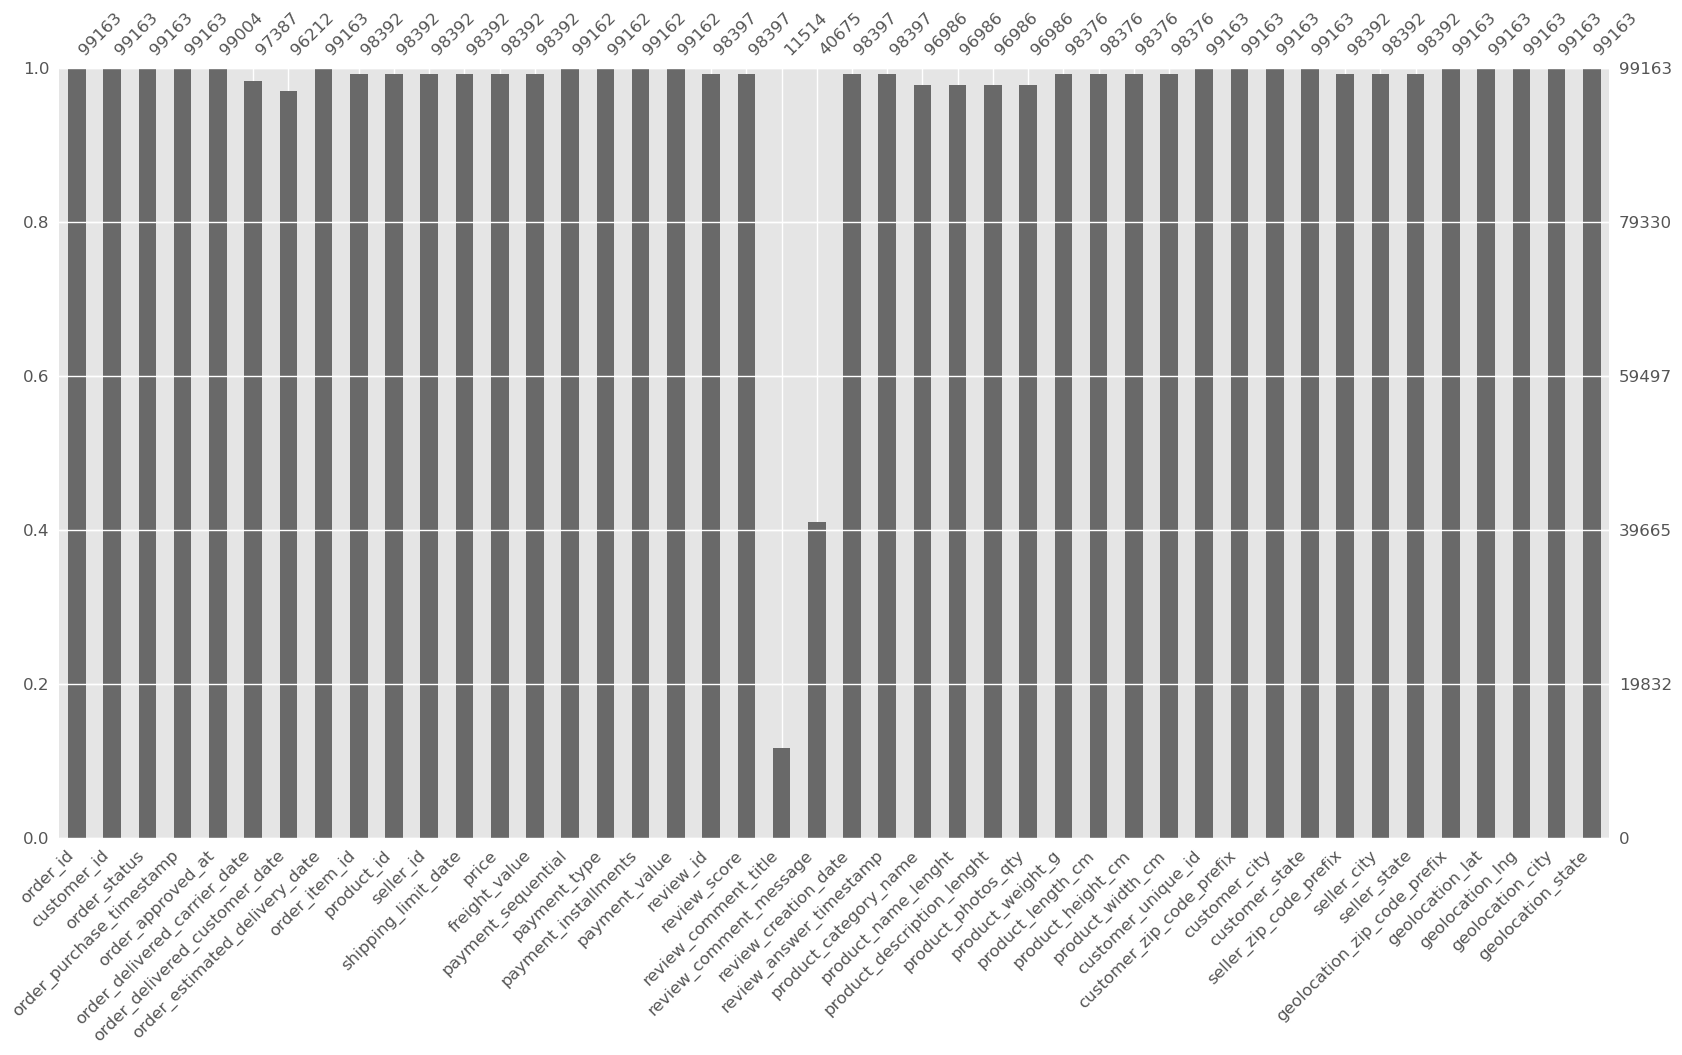

In [413]:
import missingno as msno

msno.bar(df, figsize=(20,10), fontsize=12, labels=True);

In [414]:
df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  159
order_delivered_carrier_date      1776
order_delivered_customer_date     2951
order_estimated_delivery_date        0
order_item_id                      771
product_id                         771
seller_id                          771
shipping_limit_date                771
price                              771
freight_value                      771
payment_sequential                   1
payment_type                         1
payment_installments                 1
payment_value                        1
review_id                          766
review_score                       766
review_comment_title             87649
review_comment_message           58488
review_creation_date               766
review_answer_timestamp            766
product_category_name             2177
product_name_lenght      

In [415]:
df['customer_unique_id'].value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
8855a1f48c0ea03eda049ae80ec56bfb     1
b032eb4f89573f4421aeee6d871f5150     1
e741604c468509cab635806118e2a80f     1
9a0ee875afc94eecc7f41411782c13b0     1
78a159045124eb7601951b917a42034f     1
Name: customer_unique_id, Length: 95828, dtype: int64

In [416]:
df['customer_unique_id'].value_counts() / df.shape[0]

8d50f5eadf50201ccdcedfb9e2ac8455    0.000171
3e43e6105506432c953e165fb2acf44c    0.000091
ca77025e7201e3b30c44b472ff346268    0.000071
1b6c7548a2a1f9037c1fd3ddfed95f33    0.000071
6469f99c1f9dfae7733b25662e7f1782    0.000071
                                      ...   
8855a1f48c0ea03eda049ae80ec56bfb    0.000010
b032eb4f89573f4421aeee6d871f5150    0.000010
e741604c468509cab635806118e2a80f    0.000010
9a0ee875afc94eecc7f41411782c13b0    0.000010
78a159045124eb7601951b917a42034f    0.000010
Name: customer_unique_id, Length: 95828, dtype: float64

In [417]:
for i in df.columns:
    print(i)

order_id
customer_id
order_status
order_purchase_timestamp
order_approved_at
order_delivered_carrier_date
order_delivered_customer_date
order_estimated_delivery_date
order_item_id
product_id
seller_id
shipping_limit_date
price
freight_value
payment_sequential
payment_type
payment_installments
payment_value
review_id
review_score
review_comment_title
review_comment_message
review_creation_date
review_answer_timestamp
product_category_name
product_name_lenght
product_description_lenght
product_photos_qty
product_weight_g
product_length_cm
product_height_cm
product_width_cm
customer_unique_id
customer_zip_code_prefix
customer_city
customer_state
seller_zip_code_prefix
seller_city
seller_state
geolocation_zip_code_prefix
geolocation_lat
geolocation_lng
geolocation_city
geolocation_state


In [418]:
df.loc[:, df.columns]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,sao paulo,SP,9350.0,maua,SP,3149,-23.574809,-46.587471,sao paulo,SP
72,70b35acffdf851e782ebf6fbc35eb620,8e8ee9b08afb49b080d193f98b0505af,delivered,2018-03-22 17:23:21,2018-03-22 18:05:36,2018-03-23 18:03:03,2018-03-25 17:22:41,2018-04-04 00:00:00,1.0,6cc44821f36f3156c782da72dd634e47,...,sao paulo,SP,13405.0,piracicaba,SP,3149,-23.574809,-46.587471,sao paulo,SP
120,69923a4e07ce446644394df37a710286,31f31efcb333fcbad2b1371c8cf0fa84,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,1.0,9abb00920aae319ef9eba674b7d2e6ff,...,sao paulo,SP,7025.0,guarulhos,SP,3149,-23.574809,-46.587471,sao paulo,SP
144,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,sao paulo,SP,9350.0,maua,SP,3366,-23.565578,-46.534603,sao paulo,SP
178,ded23d37cdcc25b37b4473b7be770cb2,f96144f946e8e590fabf60a3a1e3342e,delivered,2018-07-26 18:25:40,2018-07-27 02:10:26,2018-08-02 14:13:00,2018-08-07 12:12:23,2018-08-20 00:00:00,1.0,a0b7d5a992ccda646f2d34e418fff5a0,...,sao paulo,SP,37564.0,borda da mata,MG,3366,-23.565578,-46.534603,sao paulo,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18188566,04132c02a610a19773963143ba1b5bb4,3b5c800065fd3c35d15b2906c706c6f5,delivered,2017-10-04 09:13:51,2017-10-05 09:24:20,2017-10-05 20:32:33,2017-10-23 19:34:40,2017-11-03 00:00:00,1.0,0fa690a43af8987193508e22fd5b32ac,...,canto do buriti,PI,3461.0,sao paulo,SP,64890,-8.109831,-42.948918,canto do buriti,PI
18188605,5c533da06d7dfe10d9d44dbcc8bdbc6b,1285e7456591a89200ad22c4015c09ea,delivered,2017-07-02 13:10:36,2017-07-02 13:25:09,2017-07-07 17:39:39,2017-07-26 22:53:20,2017-08-02 00:00:00,1.0,80d63636780c5975e5c93b63236d481d,...,sobral,CE,75345.0,abadia de goias,GO,62051,-3.673181,-40.369237,sobral,CE
18188610,b41b68092121772821fcdd6f7fb1594c,786f59012ae920bf8b535cf145d90a63,canceled,2017-02-16 12:33:56,2017-02-16 13:10:59,NaN,NaN,2017-03-15 00:00:00,1.0,8c34ab7fffe8c063bc8c6da88aa92185,...,sao paulo,SP,18015.0,sorocaba,SP,5264,-23.446396,-46.784771,sao paulo,SP
18188615,80ba449ea98f8e879a829759b5a66294,0e07a801a6729369c02b88f4d38388cb,delivered,2018-02-25 17:37:45,2018-02-25 17:50:41,2018-02-28 20:43:49,2018-03-12 17:08:41,2018-03-27 00:00:00,1.0,cec29a60285cd686caa31318b3ad3671,...,luziania,GO,80010.0,curitiba,PR,72813,-16.234608,-47.946822,luziânia,GO


In [419]:
df['order_item_id'] = df['order_item_id'].fillna(df['order_item_id'].mean())
df['order_item_id'].sort_values(ascending=False)

10777895    7.0
16990349    7.0
16919344    6.0
13861230    5.0
17281684    5.0
           ... 
9335963     1.0
9335296     1.0
9334629     1.0
9333962     1.0
18188621    1.0
Name: order_item_id, Length: 99163, dtype: float64

In [420]:
df['price'] = df['price'].fillna(df['price'].mean())
df['price'].sort_values(ascending=False)

4049135     6735.00
18102721    6729.00
18150445    6499.00
9837839     4799.00
2961256     4690.00
             ...   
8791228        2.29
8138374        2.20
15075624       1.20
13720376       0.85
16346587       0.85
Name: price, Length: 99163, dtype: float64

In [421]:
df['order_purchase_timestamp'].value_counts() 

2018-07-28 13:11:22    3
2018-04-11 10:48:14    3
2018-08-02 12:06:09    3
2018-08-02 12:06:07    3
2018-03-31 15:08:21    3
                      ..
2018-07-10 10:43:20    1
2017-02-09 16:19:02    1
2018-07-29 20:39:20    1
2018-04-13 14:54:22    1
2017-03-11 19:51:36    1
Name: order_purchase_timestamp, Length: 98601, dtype: int64

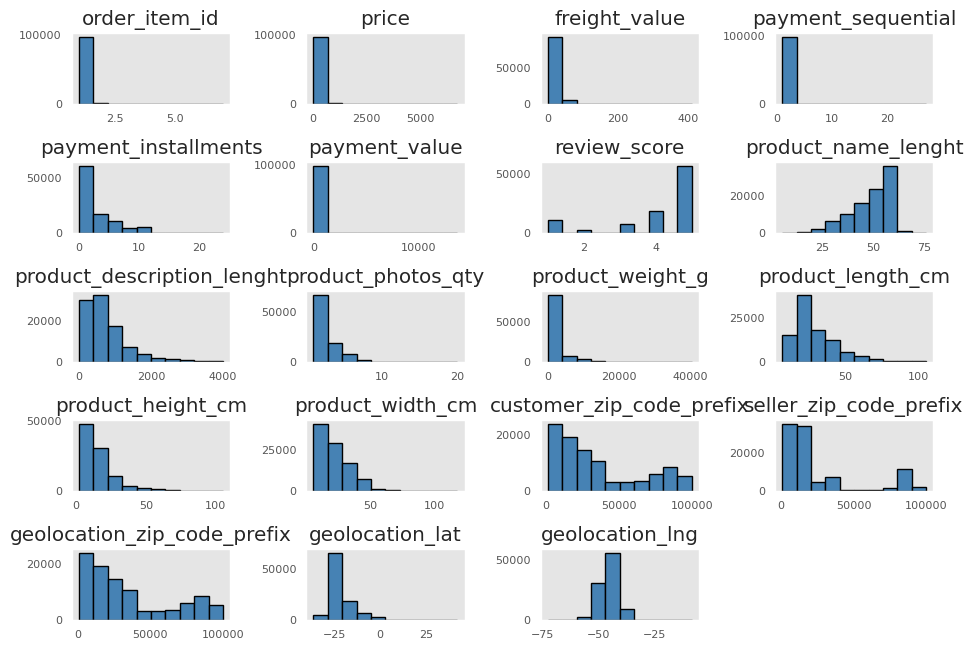

In [422]:
df.hist(color='steelblue', edgecolor='black', linewidth=1.0,
                   xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2));

In [423]:
df['customer_unique_id'].value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
8855a1f48c0ea03eda049ae80ec56bfb     1
b032eb4f89573f4421aeee6d871f5150     1
e741604c468509cab635806118e2a80f     1
9a0ee875afc94eecc7f41411782c13b0     1
78a159045124eb7601951b917a42034f     1
Name: customer_unique_id, Length: 95828, dtype: int64

In [424]:
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,99163.000000,99163.000000,98392.000000,99162.000000,99162.000000,99162.000000,98397.000000,96986.000000,96986.000000,96986.000000,98376.000000,98376.000000,98376.000000,98376.000000,99163.000000,98392.000000,99163.000000,99163.000000,99163.000000
mean,1.016770,125.927097,20.178860,1.022882,2.915583,158.331456,4.086751,48.853463,794.135607,2.249675,2103.701665,30.103003,16.484783,23.025433,35057.887176,24613.144870,35057.887176,-21.192930,-46.176190
std,0.146916,190.625988,15.913325,0.250514,2.710041,219.575600,1.347320,9.995392,654.795056,1.746179,3766.007574,16.128459,13.328427,11.738963,29784.314664,27691.597498,29784.314664,5.620584,4.066202
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1001.000000,1003.000000,-36.605374,-72.666706
25%,1.000000,42.000000,13.250000,1.000000,1.000000,60.050000,4.000000,42.000000,349.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11320.000000,6429.000000,11320.000000,-23.588296,-48.096342
50%,1.000000,79.900000,16.350000,1.000000,2.000000,103.360000,5.000000,52.000000,607.000000,2.000000,700.000000,25.000000,13.000000,20.000000,24350.000000,13566.000000,24350.000000,-22.926905,-46.630764
75%,1.000000,139.800000,21.210000,1.000000,4.000000,175.090000,5.000000,57.000000,996.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,58406.500000,29156.000000,58406.500000,-20.146615,-43.602775
max,7.000000,6735.000000,409.680000,27.000000,24.000000,13664.080000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99990.000000,99730.000000,99990.000000,42.184003,-8.577855


In [425]:
df.product_category_name.value_counts(dropna=False)

cama_mesa_banho                  9330
beleza_saude                     8764
esporte_lazer                    7667
informatica_acessorios           6653
moveis_decoracao                 6330
                                 ... 
cds_dvds_musicais                  12
la_cuisine                         11
fashion_roupa_infanto_juvenil       7
pc_gamer                            7
seguros_e_servicos                  2
Name: product_category_name, Length: 74, dtype: int64

In [426]:
# create timestamp, date, time columns 
df['timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
# df['timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], errors='coerce')
# df['date'] = df['timestamp'].dt.round("D")
# df['time'] = df['timestamp'].dt.normalize()

In [427]:
df.to_parquet('df.gzip',compression='gzip')

In [428]:
df.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  159
order_delivered_carrier_date      1776
order_delivered_customer_date     2951
order_estimated_delivery_date        0
order_item_id                        0
product_id                         771
seller_id                          771
shipping_limit_date                771
price                                0
freight_value                      771
payment_sequential                   1
payment_type                         1
payment_installments                 1
payment_value                        1
review_id                          766
review_score                       766
review_comment_title             87649
review_comment_message           58488
review_creation_date               766
review_answer_timestamp            766
product_category_name             2177
product_name_lenght      

In [429]:
grouped = df.sort_values(['order_item_id'], ascending=True).groupby(['customer_unique_id', 'price', 'order_item_id'])
grouped.sum()

,,,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
customer_unique_id,price,order_item_id,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,129.90,1.0,12.00,1.0,8.0,141.90,5.0,60.0,236.0,1.0,1500.0,34.0,7.0,32.0,7787,13405.0,7787,-23.335331,-46.828647
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,1.0,8.29,1.0,1.0,27.19,4.0,56.0,635.0,1.0,375.0,26.0,11.0,18.0,6053,2215.0,6053,-23.567395,-46.792957
0000f46a3911fa3c0805444483337064,69.00,1.0,17.22,1.0,8.0,86.22,3.0,49.0,177.0,3.0,1500.0,25.0,50.0,35.0,88115,13232.0,88115,-27.543787,-48.625680
0000f6ccb0745a6a4b88665a16c9f078,25.99,1.0,17.63,1.0,4.0,43.62,4.0,43.0,1741.0,5.0,150.0,19.0,5.0,11.0,66812,3569.0,66812,-1.311011,-48.482884
0004aac84e0df4da2b147fca70cf8255,180.00,1.0,16.89,1.0,6.0,196.89,5.0,58.0,794.0,3.0,6050.0,16.0,3.0,11.0,18040,12327.0,18040,-23.504368,-47.466156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,680.00,2.0,239.14,1.0,10.0,2067.42,5.0,51.0,423.0,1.0,30000.0,55.0,75.0,61.0,55250,3908.0,55250,-8.363166,-36.559088
fffea47cd6d3cc0a88bd621562a9d061,64.89,1.0,19.69,1.0,1.0,84.58,4.0,37.0,506.0,2.0,1720.0,33.0,36.0,27.0,44054,18500.0,44054,-12.221792,-38.962517
ffff371b4d645b6ecea244b27531430a,89.90,1.0,22.56,1.0,1.0,112.46,5.0,57.0,716.0,5.0,600.0,17.0,15.0,13.0,78552,30550.0,78552,-11.829317,-55.496443


In [430]:
# customer distribution by country
customer_cust_data=df[['customer_city', 'customer_unique_id']].drop_duplicates() 
customer_cust_data.groupby(['customer_city'])['customer_unique_id'].aggregate('count').reset_index().sort_values('customer_unique_id', ascending=False)

,customer_city,customer_unique_id
3556,sao paulo,14982
3119,rio de janeiro,6620
450,belo horizonte,2672
552,brasilia,1902
1133,curitiba,1465
...,...,...
1207,dores de guanhaes,1
1211,douradina,1
2907,ponte alta do norte,1
2906,pontao,1


In [431]:
# Validate if there are any negative values in order_item_id column
df.order_item_id.min()

1.0

In [432]:
# Validate if there are any negative values in order_item_id column
df.price.min()

0.85

# RFM Model

In [433]:
from datetime import datetime, timezone
# finding out each rfm values

# Recency
day = '2018-10-17' # max (last time in our dataset)
day = pd.to_datetime(day)
df['timestamp']=pd.to_datetime(df["timestamp"])

recency=df.groupby(['customer_unique_id']).agg({"timestamp": lambda x:((day - x.max()).days)})
recency

,timestamp
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,159
0000b849f77a49e4a4ce2b2a4ca5be3f,162
0000f46a3911fa3c0805444483337064,585
0000f6ccb0745a6a4b88665a16c9f078,369
0004aac84e0df4da2b147fca70cf8255,336
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,495
fffea47cd6d3cc0a88bd621562a9d061,310
ffff371b4d645b6ecea244b27531430a,616


In [434]:
# Frequency
freq=df.groupby(['customer_unique_id'])[['order_item_id']].count()

In [435]:
freq.sort_values(by='order_item_id', ascending=False).head(10)

,order_item_id
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,17
3e43e6105506432c953e165fb2acf44c,9
1b6c7548a2a1f9037c1fd3ddfed95f33,7
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
63cfc61cee11cbe306bff5857d00bfe4,6
f0e310a6839dce9de1638e0fe5ab282a,6
47c1a3033b8b77b3ab6e109eb4d5fdf3,6
dc813062e0fc23409cd255f7f53c7074,6


In [436]:
# Calculating total amount 
df['TotalAmount'] = df['price']*df['order_item_id']

In [437]:
# Monetary
money = df.groupby(['customer_unique_id'])[['price']].sum()

,price
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
0000f46a3911fa3c0805444483337064,69.00
0000f6ccb0745a6a4b88665a16c9f078,25.99
0004aac84e0df4da2b147fca70cf8255,180.00
...,...
fffcf5a5ff07b0908bd4e2dbc735a684,680.00
fffea47cd6d3cc0a88bd621562a9d061,64.89
ffff371b4d645b6ecea244b27531430a,89.90


In [438]:
# concat recency,freq, money
RFM=pd.concat([recency,freq, money],axis=1)
RFM

,timestamp,order_item_id,price
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,159,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,162,1,18.90
0000f46a3911fa3c0805444483337064,585,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99
0004aac84e0df4da2b147fca70cf8255,336,1,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,495,1,680.00
fffea47cd6d3cc0a88bd621562a9d061,310,1,64.89
ffff371b4d645b6ecea244b27531430a,616,1,89.90


In [439]:
#Rename columns names Recency, Frequency and Monetary
RFM.rename(columns={'timestamp' : 'Recency',
                    'order_item_id' : 'Frequency',
                    'price' : 'Monetary'}, inplace=True)

RFM.reset_index().head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,159,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,162,1,18.90
2,0000f46a3911fa3c0805444483337064,585,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,336,1,180.00


In [440]:
RFM = RFM.copy()

In [441]:
RFM_final = RFM.copy()
RFM_final

,Recency,Frequency,Monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,159,1,129.90
0000b849f77a49e4a4ce2b2a4ca5be3f,162,1,18.90
0000f46a3911fa3c0805444483337064,585,1,69.00
0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99
0004aac84e0df4da2b147fca70cf8255,336,1,180.00
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,495,1,680.00
fffea47cd6d3cc0a88bd621562a9d061,310,1,64.89
ffff371b4d645b6ecea244b27531430a,616,1,89.90


In [442]:
# Descriptive Statistics (Recency)
RFM_final.Recency.describe()


count    95828.000000
mean       287.134731
std        153.439882
min         -1.000000
25%        163.000000
50%        268.000000
75%        396.000000
max        772.000000
Name: Recency, dtype: float64

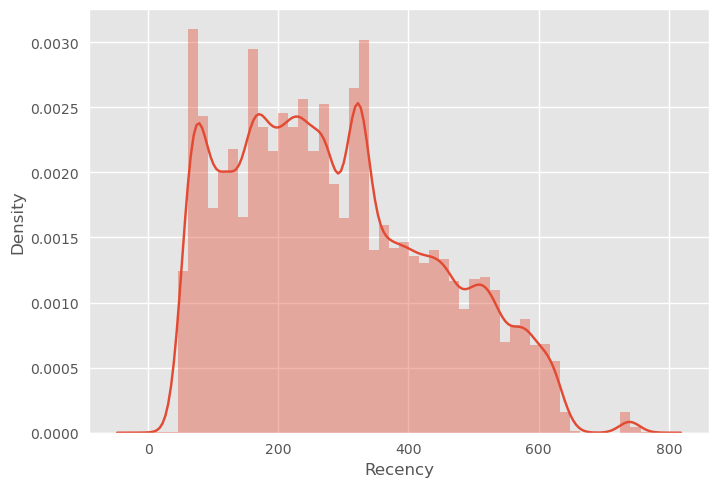

In [443]:
# Recency distribution plot
import seaborn as sns
x = RFM_final['Recency']

ax = sns.distplot(x)

In [444]:
# Descriptive Statistics (Frequency)
RFM_final.Frequency.describe()

count    95828.000000
mean         1.034802
std          0.214401
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         17.000000
Name: Frequency, dtype: float64

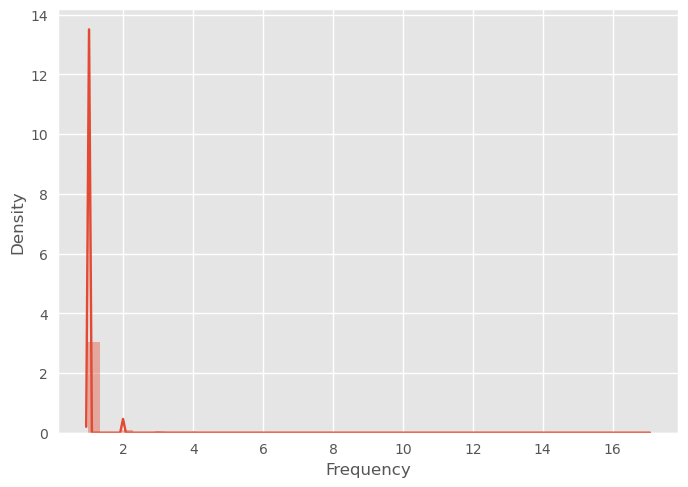

In [445]:
# Frequency distribution plot
import seaborn as sns
x = RFM_final['Frequency']

ax = sns.distplot(x)

In [446]:
# Descriptive Statistics (Monetary)
RFM_final.Monetary.describe()

count    95828.000000
mean       130.309603
std        196.699557
min          0.850000
25%         44.000000
50%         79.990000
75%        144.410000
max       7388.000000
Name: Monetary, dtype: float64

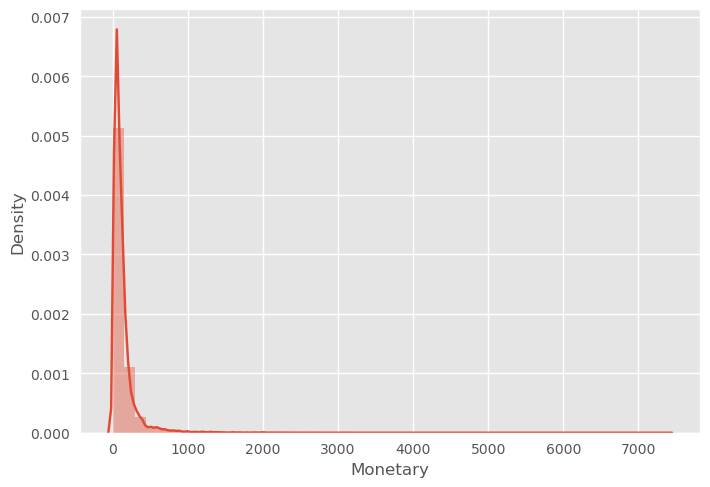

In [447]:
# Monetary distribution plot
import seaborn as sns
x = RFM_final['Monetary']

ax = sns.distplot(x)

In [448]:
#Split info four segments using quantiles 
quantiles = RFM_final.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [449]:
quantiles

{'Recency': {0.25: 163.0, 0.5: 268.0, 0.75: 396.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 44.0, 0.5: 79.99, 0.75: 144.41}}

In [450]:
#Functions to create R, F and M segments ( to subdivide the dataset in 4 groups)

# RScoring,1 to the lower value of Recency, because lower the recency, better it is and also means customer is more engaged.
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1 
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# FnScoring 1 to the highest Frequency and Monetary, because higher the value Frequency and Monetary better it is
def FnScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [451]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFM_final['R'] = RFM_final['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFM_final['F'] = RFM_final['Frequency'].apply(FnScoring, args=('Frequency',quantiles,))
RFM_final['M'] = RFM_final['Monetary'].apply(FnScoring, args=('Monetary',quantiles,))
RFM_final.head()

,Recency,Frequency,Monetary,R,F,M
customer_unique_id,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,159,1,129.90,1,4,2
0000b849f77a49e4a4ce2b2a4ca5be3f,162,1,18.90,1,4,4
0000f46a3911fa3c0805444483337064,585,1,69.00,4,4,3
0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99,3,4,4
0004aac84e0df4da2b147fca70cf8255,336,1,180.00,3,4,1


In [452]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFM_final['RFMGroup'] = RFM_final.R.map(str) + RFM_final.F.map(str) + RFM_final.M.map(str)

#Calculate and Add RFM value column showing total sum of RFM values
RFM_final['RFMScore'] = RFM_final[['R', 'F', 'M']].sum(axis = 1)
RFM_final.sort_values('RFMScore' , ascending=False).head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
customer_unique_id,,,,,,,,
295ce59ab88364adb47d20e7e8dc075b,422,1,35.0,4,4,4,444,12
4f26b12d535556bbf0f6b04e2216c35c,467,1,9.9,4,4,4,444,12
1fcd939eb433bfd16c41e103a1f970f3,466,1,24.9,4,4,4,444,12
92df0347ffc0f4e76c01020903d7f2d6,579,1,16.9,4,4,4,444,12
de8842603c4ac178323a8aedcd913d36,495,1,12.0,4,4,4,444,12


In [453]:
RFM_Loyal = RFM_final.copy()

# K-means Clustering 

In [454]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled=scaler.fit_transform(RFM_final)

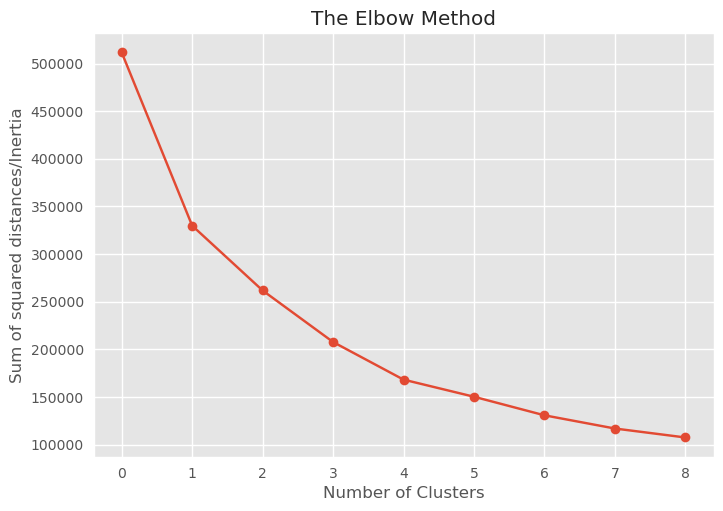

In [455]:
from sklearn.cluster import KMeans
import numpy as np


# calculate k using python, with the elbow method
Sum_of_squared_distances=[]

# define our possible k values
K = [i for i in np.arange(2,11)]

# iterate through each of our values
for i in K:
    
    # iterate through, taking each value from 
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
    
    # fit it on YOUR dataframe
    kmeans.fit(scaled)
    
    # append the inertia to our array
    Sum_of_squared_distances.append(kmeans.inertia_)
    
plt.plot(Sum_of_squared_distances, marker ='o')
plt.title('The Elbow Method')

plt.xlabel('Number of Clusters')

plt.ylabel('Sum of squared distances/Inertia')

plt.show()


In [456]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(scaled)

#Find the clusters for the observation given in the dataset
RFM_final['Cluster'] = (KMean_clust.labels_)
RFM_final

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster
customer_unique_id,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,159,1,129.90,1,4,2,142,7,2
0000b849f77a49e4a4ce2b2a4ca5be3f,162,1,18.90,1,4,4,144,9,2
0000f46a3911fa3c0805444483337064,585,1,69.00,4,4,3,443,11,1
0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99,3,4,4,344,11,1
0004aac84e0df4da2b147fca70cf8255,336,1,180.00,3,4,1,341,8,1
...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,495,1,680.00,4,4,1,441,9,1
fffea47cd6d3cc0a88bd621562a9d061,310,1,64.89,3,4,3,343,10,1
ffff371b4d645b6ecea244b27531430a,616,1,89.90,4,4,2,442,10,1


<Figure size 700x700 with 0 Axes>

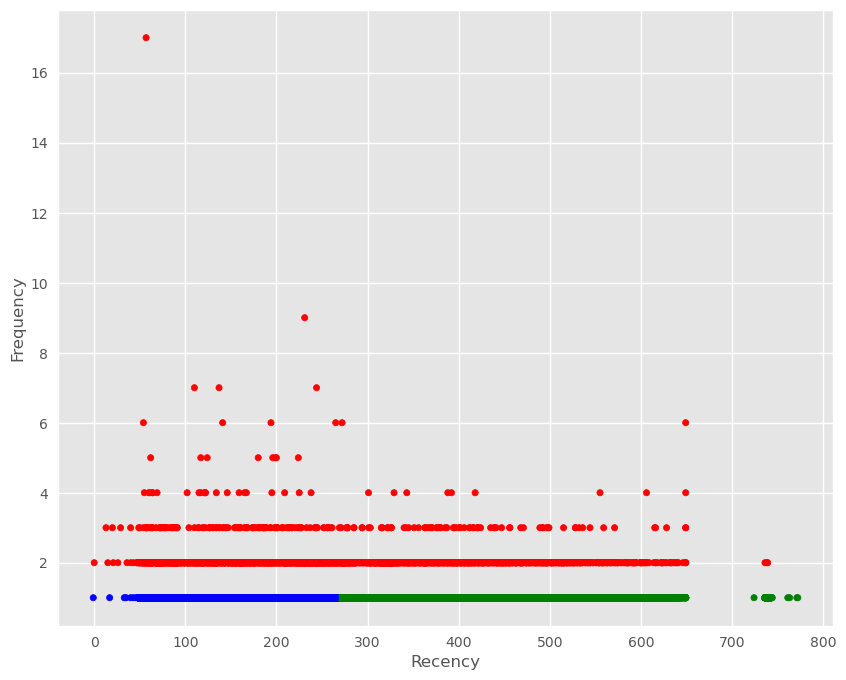

In [457]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFM_final['Color'] = RFM_final['Cluster'].map(lambda p: Colors[p])
ax = RFM_final.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFM_final['Color']
)

# Calculate Silhouette Score for K-Means Clusters With n_clusters = N

Le score de chaque échantillon est calculé en faisant la moyenne du coefficient de silhouette (différence entre la distance moyenne intra-cluster (cohésion = a(i) et la distance moyenne du cluster le plus proche pour chaque échantillon (separation b(i), normalisée par la valeur maximale. Cela nous donne un score entre -1 et 1, qui nous permet de déterminer si la séparation est efficace ou si les points sont assignés au mauvais cluster.

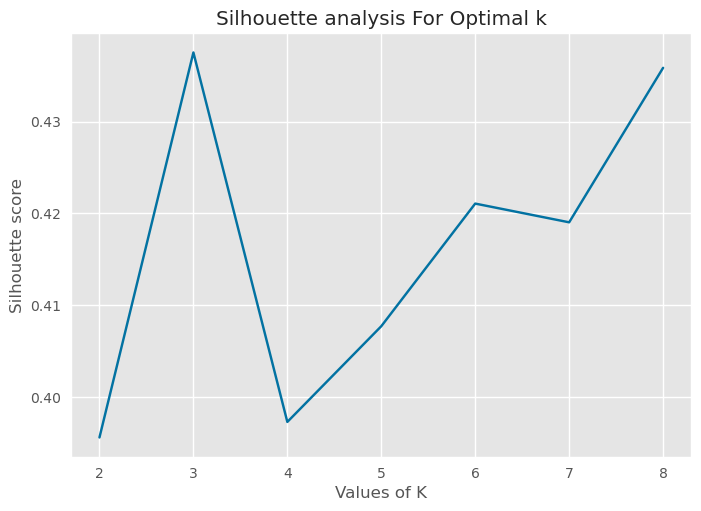

In [459]:
from sklearn.metrics import silhouette_score

# define our possible k values
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []

# iterate through each of our values
for num_clusters in range_n_clusters:
 
    # initialise kmeans
    # iterate through, taking each value from 
    kmeans = KMeans(n_clusters=num_clusters)
    # fit it on YOUR dataframe
    kmeans.fit(scaled)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(scaled, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [460]:
# RFM_final['Clusters']=(kmeans.labels_ +1)

In [461]:
RFM_final.to_parquet('RFM.gzip',compression='gzip')

For n_clusters = 2 the silhoette_score is : 0.3956185542607329
For n_clusters = 3 the silhoette_score is : 0.4375111539812277
For n_clusters = 4 the silhoette_score is : 0.39730917366962015
For n_clusters = 5 the silhoette_score is : 0.4077245825530305
For n_clusters = 6 the silhoette_score is : 0.4210702756314733
For n_clusters = 7 the silhoette_score is : 0.4244766677811445
For n_clusters = 8 the silhoette_score is : 0.433828916483786


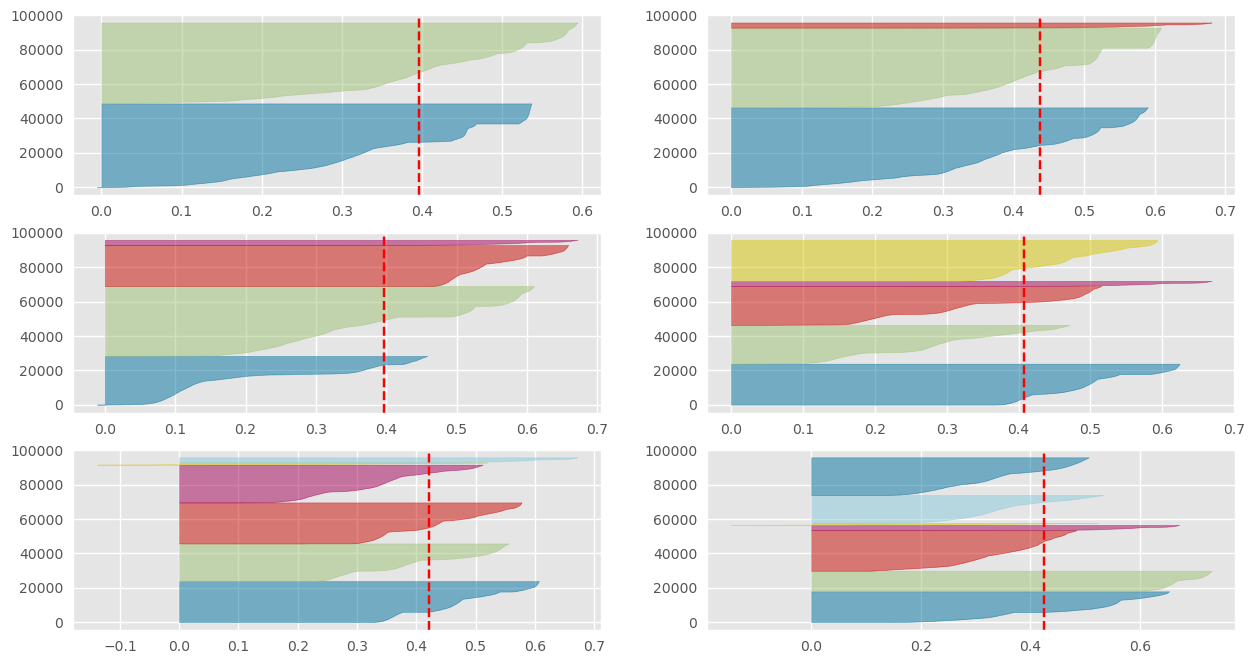

In [462]:
# visualisation de Silhouette et n klusters
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

fig, ax = plt.subplots(3, 2, figsize=(15,8))

# define our possible k values
n_clusters = [2, 3, 4, 5, 6, 7, 8]

for i in n_clusters:
    '''
    Create KMeans instance for different number of clusters
    '''
    
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    cluster_labels = km.fit(scaled)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''

    kmeans = KMeans(n_clusters=n_clusters)
    
#     cluster_labels = kmeans.labels_
    
    
    try: 
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    # fit it on YOUR dataframe
    
        visualizer = visualizer.fit(scaled)
        
        # silhouette score
#         silhouette_avg = silhouette_score(scaled, cluster_labels)
        
    except IndexError: # catch the error
        pass
    # initialise kmeans
    # iterate through, taking each value from
    
    score = silhouette_score(scaled, km.labels_, metric='euclidean')
        
    print("For n_clusters =", i,
          "the silhoette_score is :", score)

# Conclusion:

K va être 3 base sur le graphiques.

# Cluster Profiling and Dashboard 

In [556]:
# Perform k-Means Clustering or building the k-Means clustering model
dfgrp = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 1000)
dfgrp.fit(scaled)

#Find the clusters for the observation given in the dataset
RFM_final['Clusters'] = (dfgrp.labels_ + 1)

In [557]:
# most frequent column values for each cluster
RFM_final.groupby(["Clusters"]).agg(lambda x:x.value_counts().index[0])

,Recency,Frequency,Monetary
Clusters,,,
1,326,1,59.9
2,70,1,49.9
3,326,2,139.8


In [558]:
# box1 = RFM_final[RFM_final['Clusters']==1]
# box1
clusters = RFM_final[RFM_final['Clusters']==1]
clusters

,Recency,Frequency,Monetary,Clusters
customer_unique_id,,,,
0000f46a3911fa3c0805444483337064,585,1,69.00,1
0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99,1
0004aac84e0df4da2b147fca70cf8255,336,1,180.00,1
0005e1862207bf6ccc02e4228effd9a0,591,1,135.00,1
0006fdc98a402fceb4eb0ee528f6a8d4,455,1,13.90,1
...,...,...,...,...
fffbf87b7a1a6fa8b03f081c5f51a201,293,1,149.00,1
fffcf5a5ff07b0908bd4e2dbc735a684,495,1,680.00,1
fffea47cd6d3cc0a88bd621562a9d061,310,1,64.89,1


# Clusters visualisation

## BoxPlot

In [561]:
#BoxPlot
def Boxplot(n):
    plt.style.use('ggplot')
    fig = plt.figure(figsize=(21,40))
    numerical_features = ['Recency', 'Frequency', 'Monetary']

    sub = 0
    for i in range(len(numerical_features)):
        fig.add_subplot(6,2,i+1)
        colonne = numerical_features[i]
        ax = sns.boxplot(x="Clusters", y=colonne, data=RFM_final[RFM_final['Clusters']==n])
        for tick in ax.get_xticklabels():
            tick.set_rotation(30)
        sub += 1

    fig.text(0.5, 0.90, r"RFM", ha="center")

plt.show()

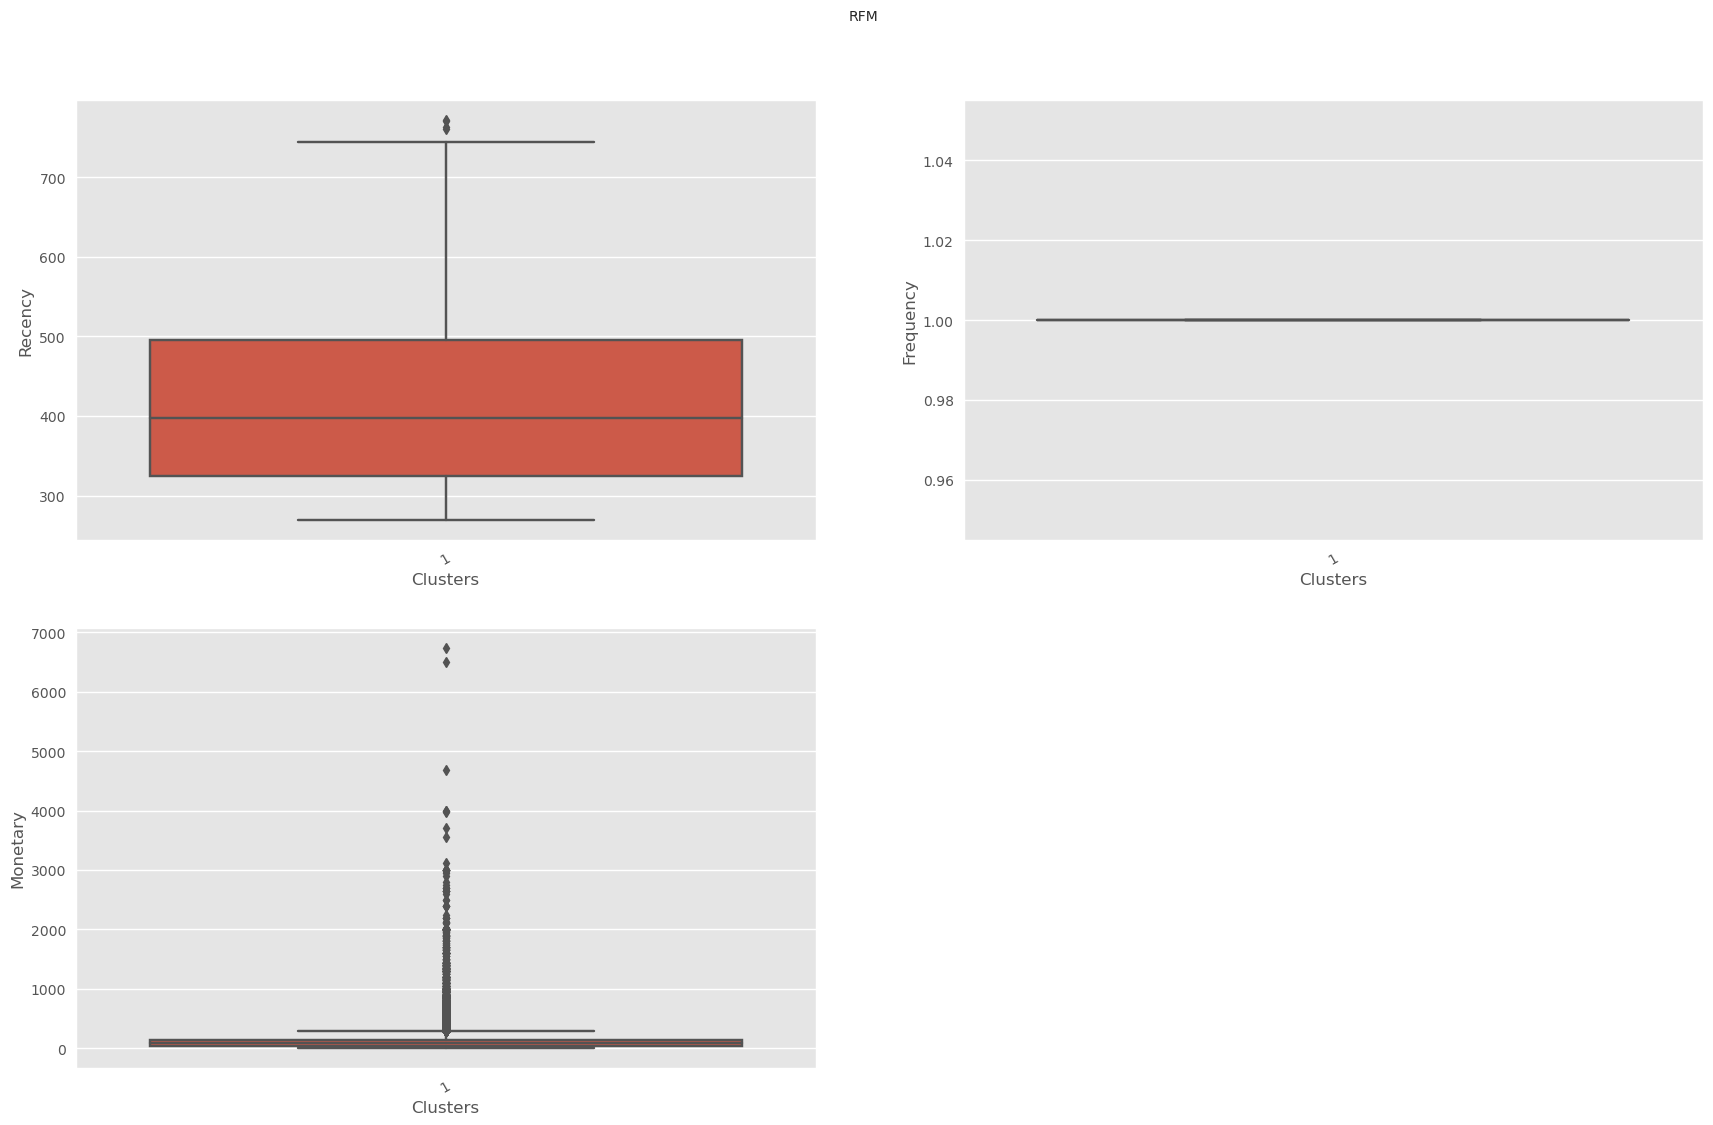

In [562]:
Boxplot(1)

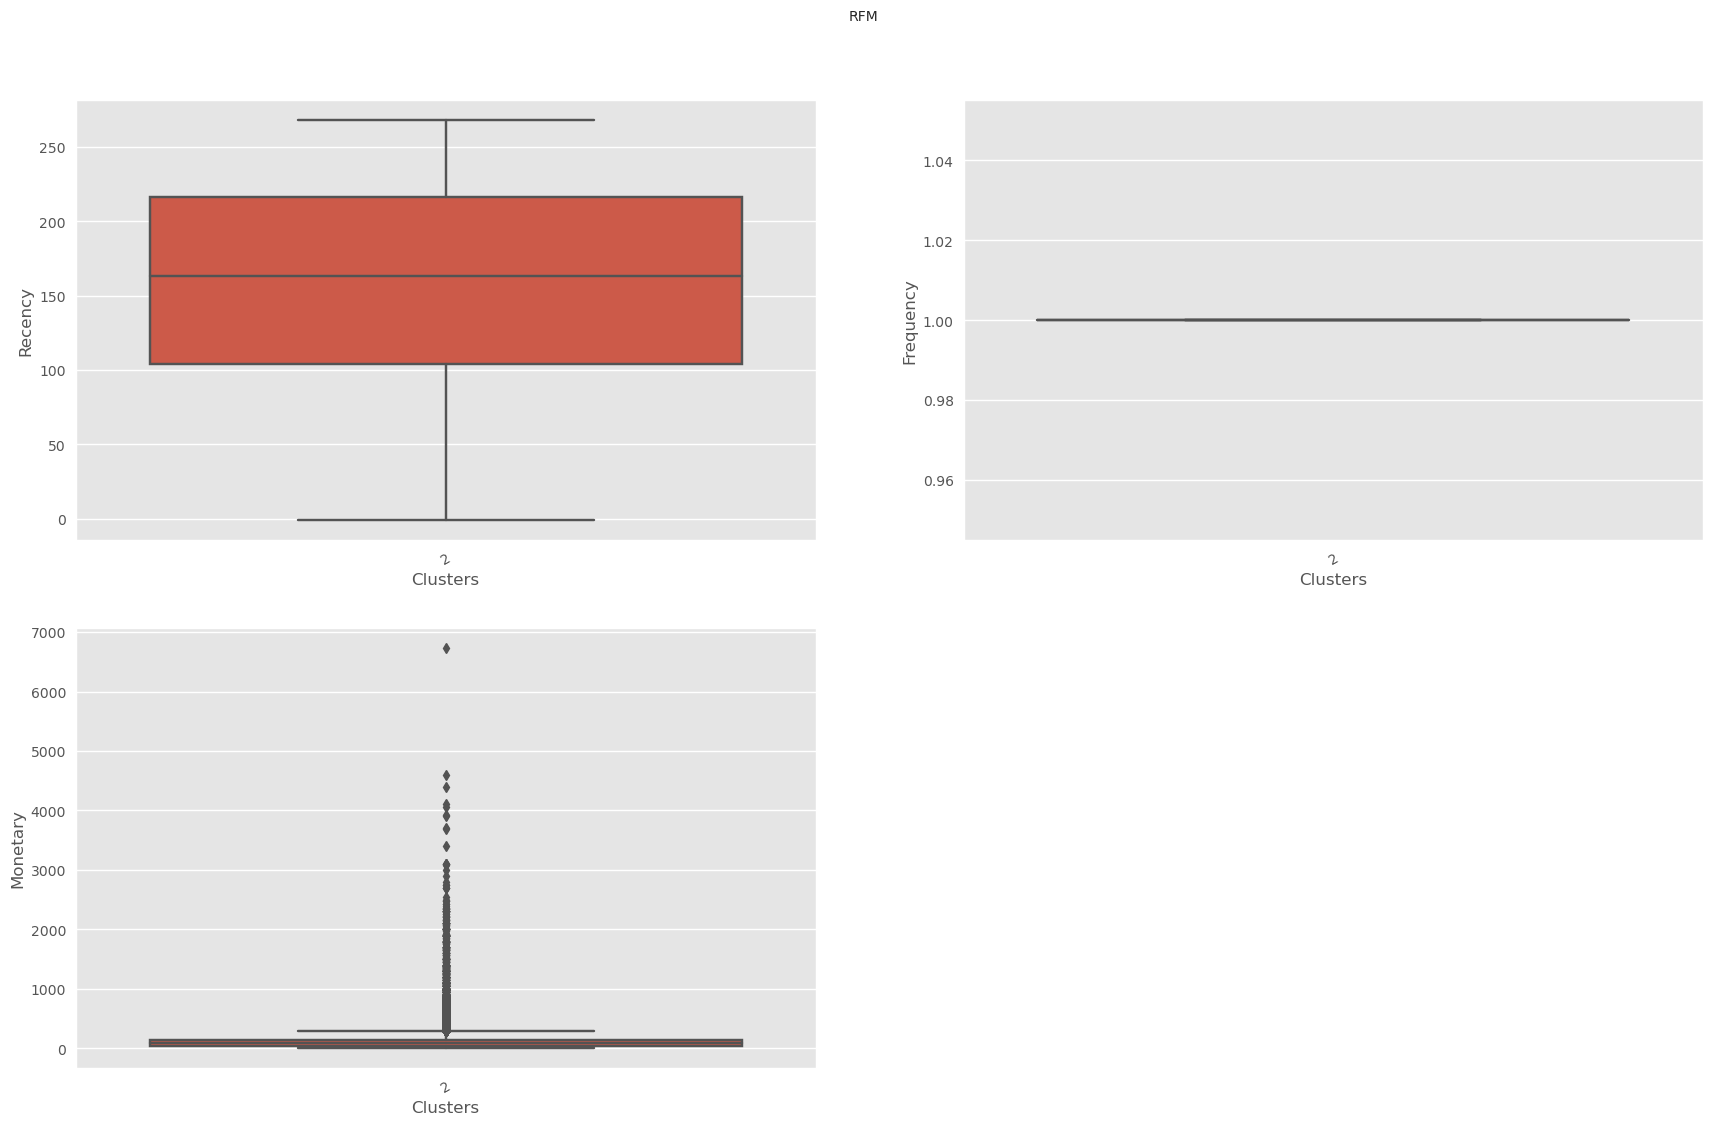

In [563]:
Boxplot(2)

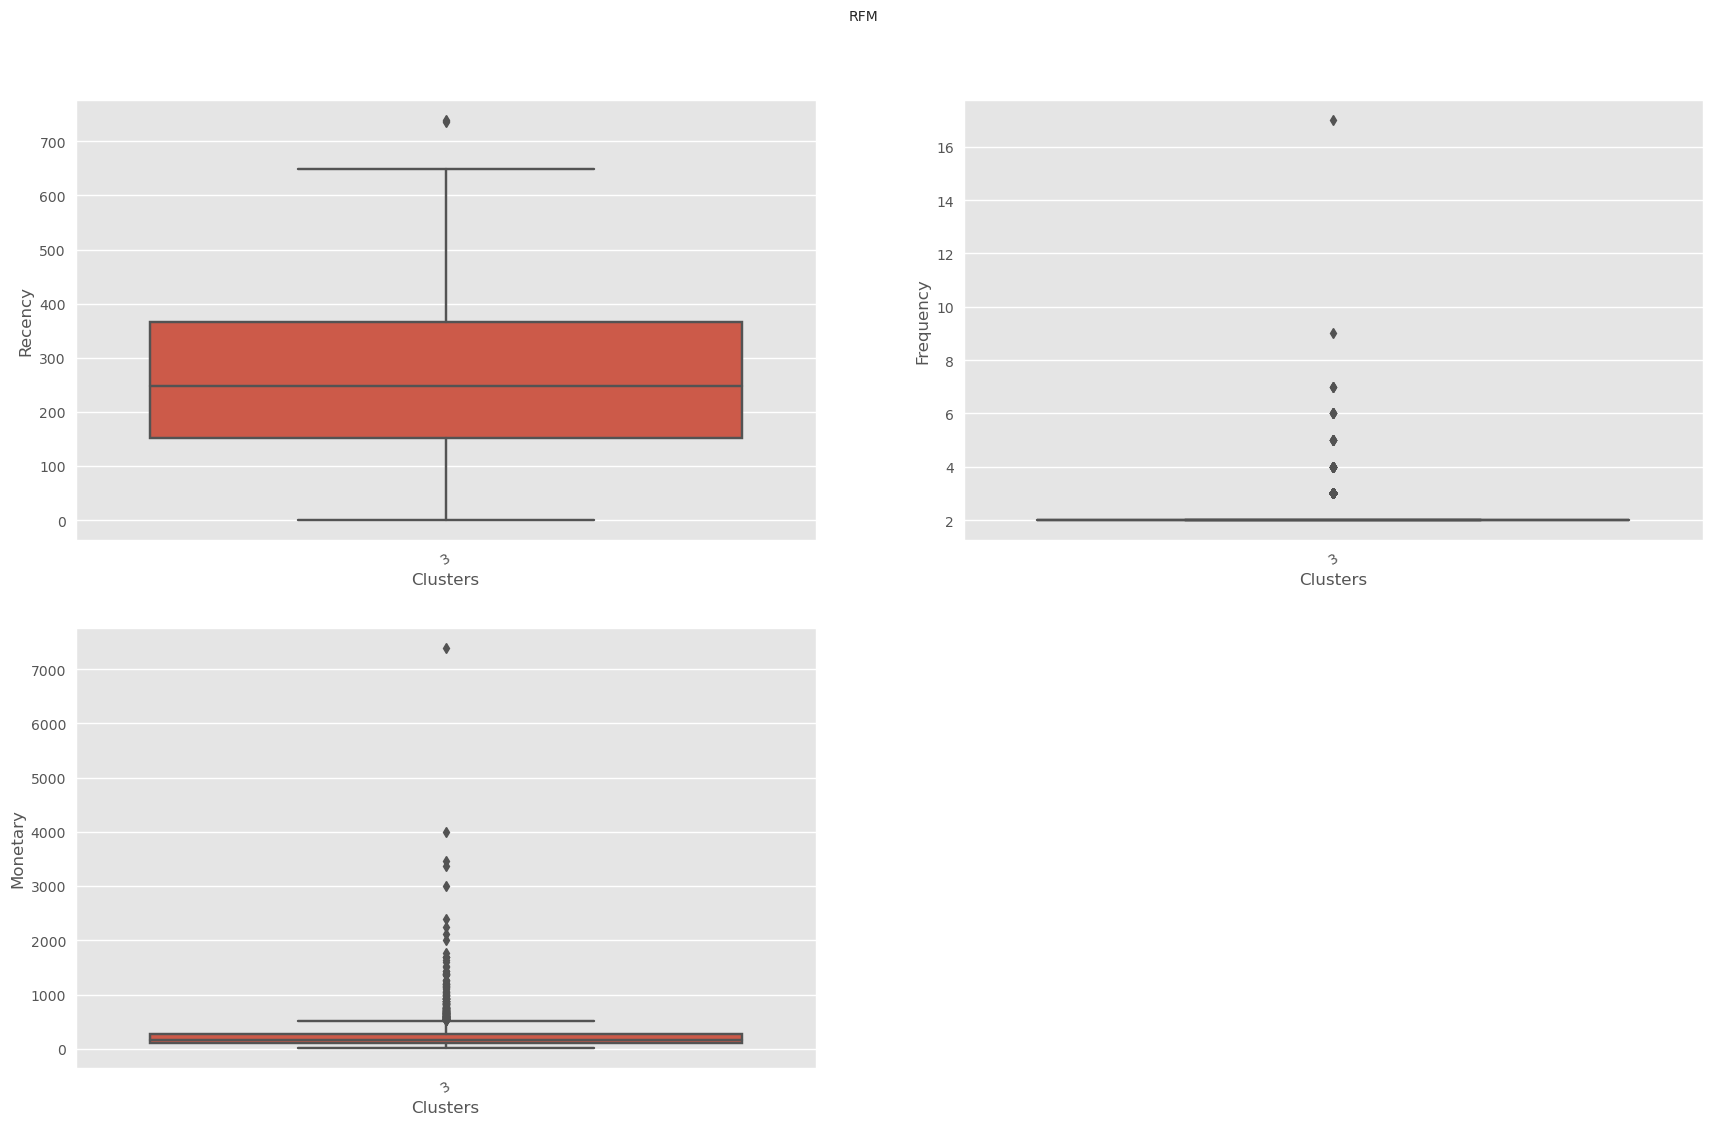

In [564]:
Boxplot(3)

## ScatterPlot

In [532]:
# Pair-wise Scatter Plots

def ScatterPlots(n):
    cols = ['Recency', 'Frequency', 'Monetary']

    pp = sns.pairplot(RFM_final[RFM_final['Clusters']==n][cols], size=1.8, aspect=1.8,
                      plot_kws=dict(edgecolor="k", linewidth=0.5),
                      diag_kind="kde", diag_kws=dict(shade=True))

    fig = pp.fig
    fig.subplots_adjust(top=0.93, wspace=0.3)
    t = fig.suptitle('Numerical Attributes Pairwise Plots', fontsize=14)

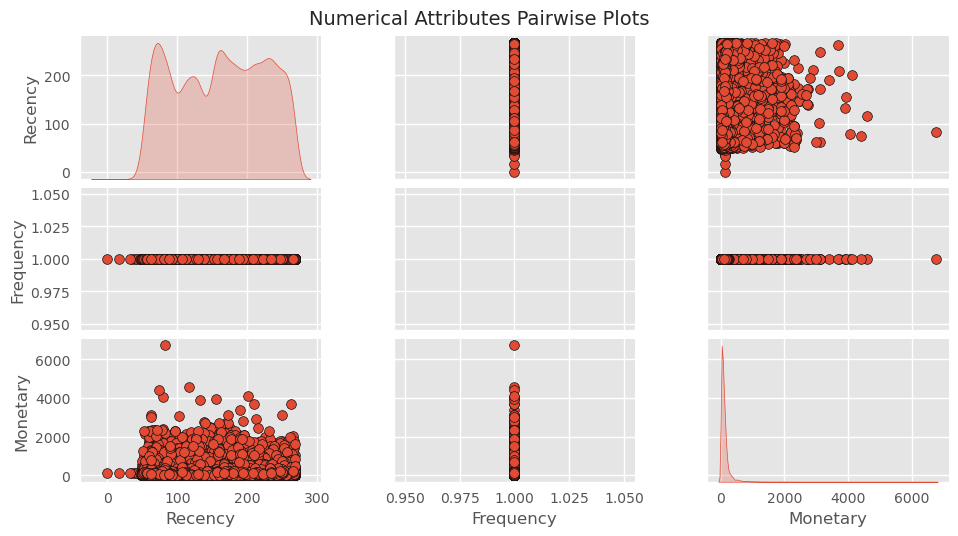

In [533]:
ScatterPlots(1)

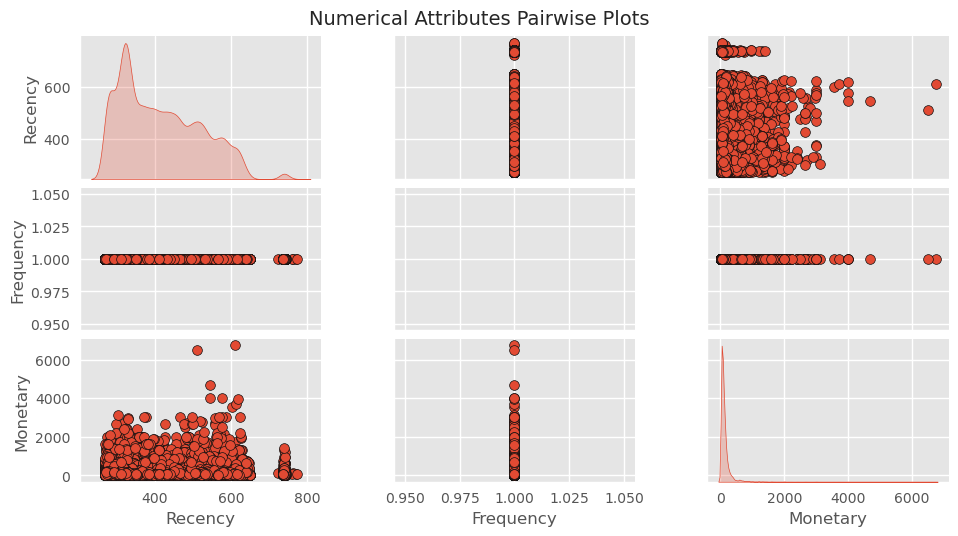

In [534]:
ScatterPlots(2)

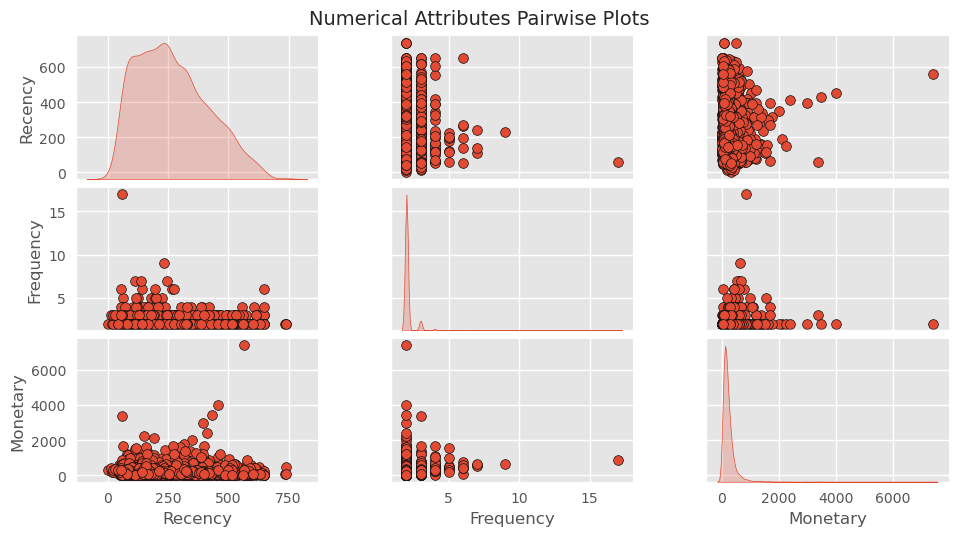

In [535]:
ScatterPlots(3)

# HeatMap correlation

In [536]:
RFM_final=RFM_final[['Recency', 'Frequency', 'Monetary', 'Clusters']]

In [537]:
RFM_final.to_parquet('RFM_final.gzip',compression='gzip')

In [538]:
RFM_final_heat = RFM_final.reset_index()
RFM_final_heat

,customer_unique_id,Recency,Frequency,Monetary,Clusters
0,0000366f3b9a7992bf8c76cfdf3221e2,159,1,129.90,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,162,1,18.90,1
2,0000f46a3911fa3c0805444483337064,585,1,69.00,2
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99,2
4,0004aac84e0df4da2b147fca70cf8255,336,1,180.00,2
...,...,...,...,...,...
95823,fffcf5a5ff07b0908bd4e2dbc735a684,495,1,680.00,2
95824,fffea47cd6d3cc0a88bd621562a9d061,310,1,64.89,2
95825,ffff371b4d645b6ecea244b27531430a,616,1,89.90,2
95826,ffff5962728ec6157033ef9805bacc48,167,1,115.00,1


In [539]:
cust=RFM_final_heat.drop(['customer_unique_id'],axis=1)
cust

# sns.heatmap(cust, annot=True, fmt=".1f")


,Recency,Frequency,Monetary,Clusters
0,159,1,129.90,1
1,162,1,18.90,1
2,585,1,69.00,2
3,369,1,25.99,2
4,336,1,180.00,2
...,...,...,...,...
95823,495,1,680.00,2
95824,310,1,64.89,2
95825,616,1,89.90,2
95826,167,1,115.00,1


In [542]:
# Correlation Matrix Heatmap 
# DataFrame.corr(method='pearson', min_periods=1)

def HeatMap(n):
    f, ax = plt.subplots(figsize=(10, 6))
    corr = cust[cust['Clusters']==n].corr()
    hm = sns.heatmap(round(corr,2), ax=ax, annot=True, cmap="coolwarm",fmt='.2f',linewidths=.05)
    f.subplots_adjust(top=0.93)
    t= f.suptitle('Numerical Features Heatmap', fontsize=14)

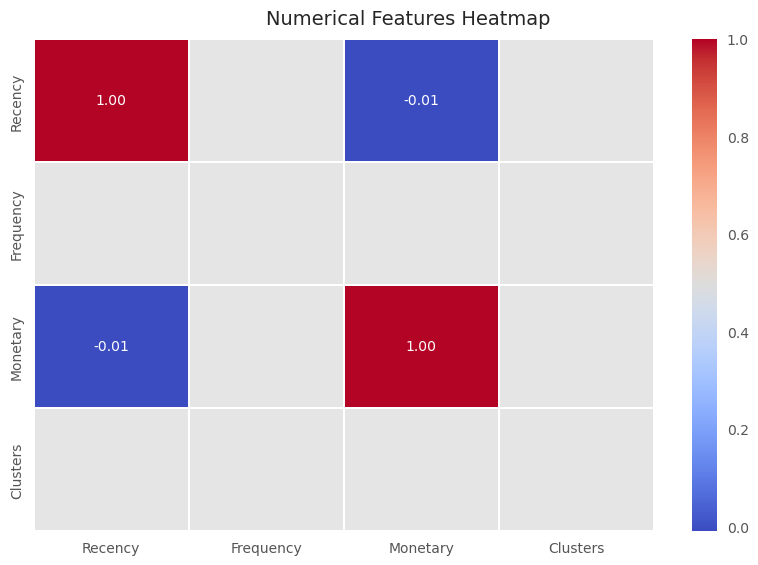

In [543]:
HeatMap(1)

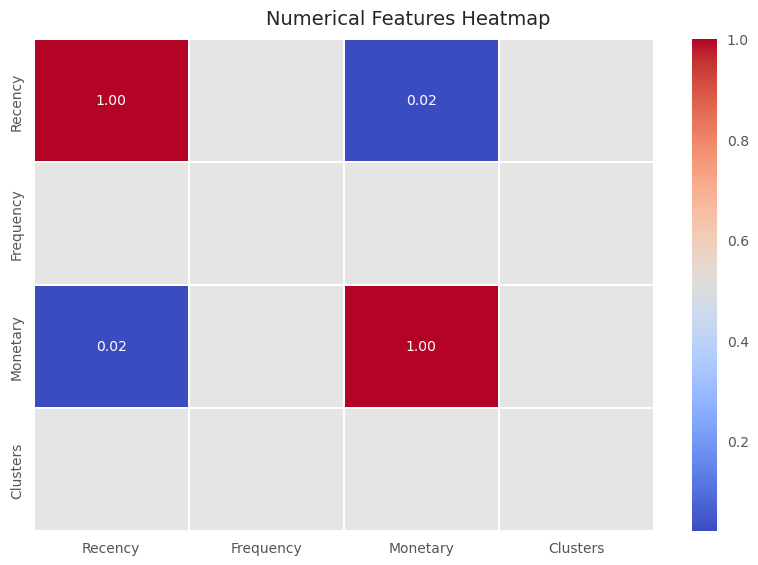

In [544]:
HeatMap(2)

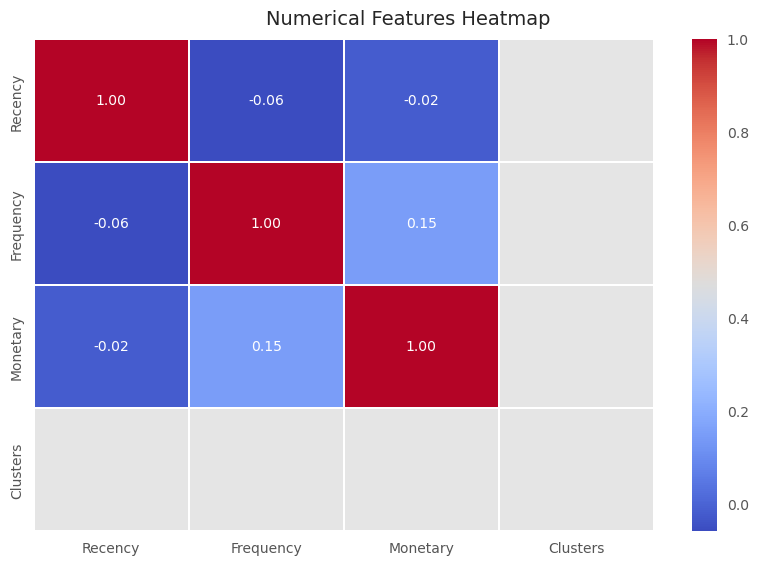

In [545]:
HeatMap(3)

In [546]:
group=cust.groupby(['Clusters'])['Recency','Frequency','Monetary'].mean()
group

,Recency,Frequency,Monetary
Clusters,,,
1,160.622941,1.000000,127.116198
2,414.721713,1.000000,127.065675
3,267.709839,2.116131,230.317175


In [549]:
def func(row):
    if row["Clusters"]==1:
        return 'Medium Clients'
    elif row["Clusters"]==2:
        return 'Smaller Clients'
    else:
        return 'Bigger Clients'

In [550]:
cust["Conditions"]=cust.apply(func,axis=1)

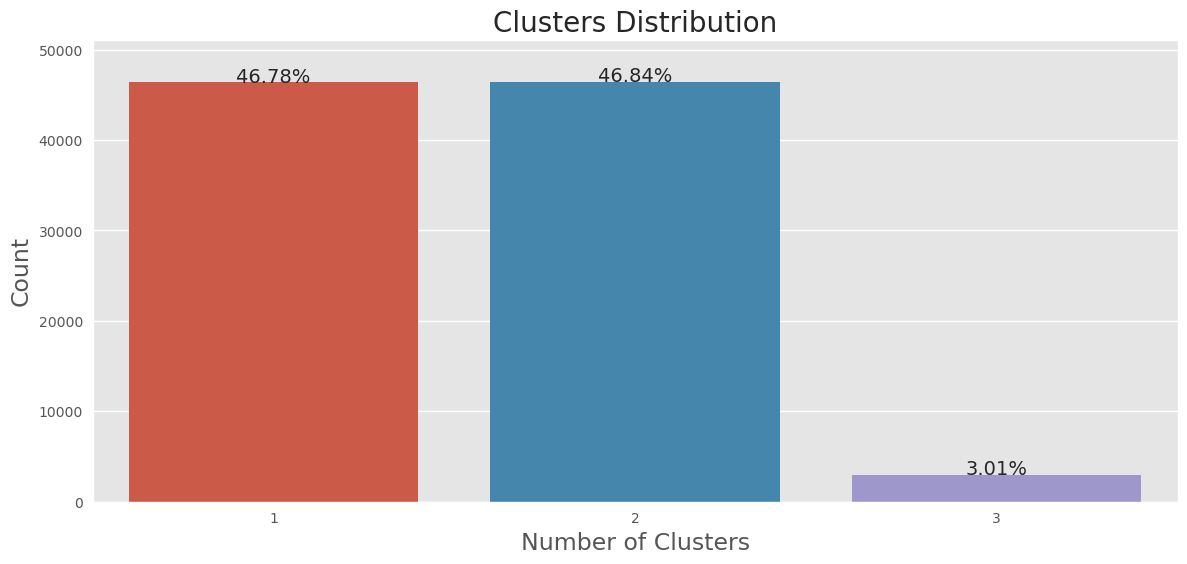

In [551]:
total = len(df)

plt.figure(figsize=(14,6))

g = sns.countplot(x='Clusters', data=cust[cust['Clusters'] != 'not_defined'])
g.set_title("Clusters Distribution", fontsize=20)
g.set_xlabel("Number of Clusters", fontsize=17)
g.set_ylabel("Count", fontsize=17)

sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.1)
plt.show()

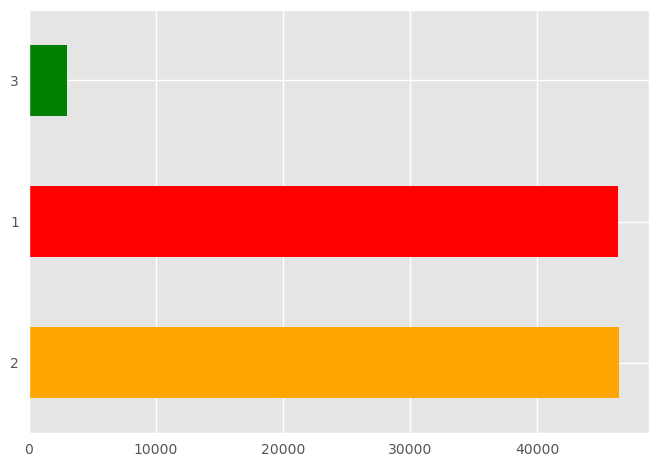

In [552]:
result=cust["Clusters"].value_counts()
result.plot(kind='barh',color=["Orange","red", "green"]);

# Niveau de Fidélité des Clients

In [487]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM

RFM_Loyal['RFMGroup'] = RFM_Loyal.R.map(str) + RFM_Loyal.F.map(str) + RFM_Loyal.M.map(str)

#Calculate and Add RFM value column showing total sum of RFM values
RFM_Loyal['RFMScore'] = RFM_Loyal[['R', 'F', 'M']].sum(axis = 1)
RFM_Loyal.sort_values('RFMScore' , ascending=False).head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
customer_unique_id,,,,,,,,
295ce59ab88364adb47d20e7e8dc075b,422,1,35.0,4,4,4,444,12
4f26b12d535556bbf0f6b04e2216c35c,467,1,9.9,4,4,4,444,12
1fcd939eb433bfd16c41e103a1f970f3,466,1,24.9,4,4,4,444,12
92df0347ffc0f4e76c01020903d7f2d6,579,1,16.9,4,4,4,444,12
de8842603c4ac178323a8aedcd913d36,495,1,12.0,4,4,4,444,12


In [488]:
#Assign Loyalty Level to each customer (The lower the score of RFM the more engadged client will be)

Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFM_Loyal.RFMScore, q = 4, labels = Loyalty_Level)
RFM_Loyal['RFM_Loyalty_Level'] = Score_cuts.values
RFM_Loyal.reset_index().head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,0000366f3b9a7992bf8c76cfdf3221e2,159,1,129.90,1,4,2,142,7,Platinum
1,0000b849f77a49e4a4ce2b2a4ca5be3f,162,1,18.90,1,4,4,144,9,Gold
2,0000f46a3911fa3c0805444483337064,585,1,69.00,4,4,3,443,11,Bronze
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,25.99,3,4,4,344,11,Bronze
4,0004aac84e0df4da2b147fca70cf8255,336,1,180.00,3,4,1,341,8,Platinum


In [489]:
#Validate the data for RFMGroup = 111 (best customers we can cross validate other products on them)

# customers 444 are almost in the verge of churning out so we can trigger some cupon to try to prevent this customers from churning out
RFM_Loyal[RFM_Loyal['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,46450c74a0d8c5ca9395da1daac6c120,60,3,3361.844193,1,1,1,111,3,Platinum
1,7b0eaf68a16e4808e5388c67345033c9,150,2,2238.420000,1,1,1,111,3,Platinum
2,4facc2e6fbc2bffab2fea92d2b4aa7e4,64,4,1686.900000,1,1,1,111,3,Platinum
3,87c9e7ba960e4c2e6bd786b162adc639,156,2,1597.800000,1,1,1,111,3,Platinum
4,fe81bb32c243a86b2f86fbf053fe6140,117,5,1535.400000,1,1,1,111,3,Platinum
5,fc24db02becd484accefaa5af59c18b1,113,2,1499.980000,1,1,1,111,3,Platinum
6,012a218df8995d3ec3bb221828360c86,120,2,1429.800000,1,1,1,111,3,Platinum
7,297ec5afd18366f5ba27520cc4954151,157,3,1377.440000,1,1,1,111,3,Platinum
8,231d36f5c4b238c26f449ffd98c79180,161,2,1373.890000,1,1,1,111,3,Platinum
9,4711348768db55c57a67aba080ead566,131,2,1368.990000,1,1,1,111,3,Platinum


In [490]:
pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [491]:
# import chart_studio as cs
# import plotly.offline as po
# import plotly.graph_objs as gobj

# #Recency Vs Frequency
# graph = RFM_Loyal.query("Monetary < 3361 and Frequency < 2")

# plot_data = [
#     gobj.Scatter(
#         x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
#         y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
#         mode='markers',
#         name='Bronze',
#         marker= dict(size= 7,
#             line= dict(width=1),
#             color= 'blue',
#             opacity= 0.8
#            )
#     ),
#         gobj.Scatter(
#         x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
#         y=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
#         mode='markers',
#         name='Silver',
#         marker= dict(size= 9,
#             line= dict(width=1),
#             color= 'green',
#             opacity= 0.5
#            )
#     ),
#         gobj.Scatter(
#         x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
#         y=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
#         mode='markers',
#         name='Gold',
#         marker= dict(size= 11,
#             line= dict(width=1),
#             color= 'red',
#             opacity= 0.9
#            )
#     ),
#     gobj.Scatter(
#         x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
#         y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
#         mode='markers',
#         name='Platinum',
#         marker= dict(size= 13,
#             line= dict(width=1),
#             color= 'black',
#             opacity= 0.9
#            )
#     ),
# ]

# plot_layout = gobj.Layout(
#         yaxis= {'title': "Frequency"},
#         xaxis= {'title': "Recency"},
#         title='Segments'
#     )
# fig = gobj.Figure(data=plot_data, layout=plot_layout)
# po.iplot(fig)

# #Frequency Vs Monetary
# graph = RFM_Loyal.query("Monetary < 3361 and Frequency < 2")

# plot_data = [
#     gobj.Scatter(
#         x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
#         y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
#         mode='markers',
#         name='Bronze',
#         marker= dict(size= 7,
#             line= dict(width=1),
#             color= 'blue',
#             opacity= 0.8
#            )
#     ),
#         gobj.Scatter(
#         x=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
#         y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
#         mode='markers',
#         name='Silver',
#         marker= dict(size= 9,
#             line= dict(width=1),
#             color= 'green',
#             opacity= 0.5
#            )
#     ),
#         gobj.Scatter(
#         x=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
#         y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
#         mode='markers',
#         name='Gold',
#         marker= dict(size= 11,
#             line= dict(width=1),
#             color= 'red',
#             opacity= 0.9
#            )
#     ),
#     gobj.Scatter(
#         x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
#         y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
#         mode='markers',
#         name='Platinum',
#         marker= dict(size= 13,
#             line= dict(width=1),
#             color= 'black',
#             opacity= 0.9
#            )
#     ),
# ]

# plot_layout = gobj.Layout(
#         yaxis= {'title': "Monetary"},
#         xaxis= {'title': "Frequency"},
#         title='Segments'
#     )
# fig = gobj.Figure(data=plot_data, layout=plot_layout)
# po.iplot(fig)

# #Recency Vs Monetary
# graph = RFM_Loyal.query("Monetary < 3361 and Frequency < 2")

# plot_data = [
#     gobj.Scatter(
#         x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
#         y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
#         mode='markers',
#         name='Bronze',
#         marker= dict(size= 7,
#             line= dict(width=1),
#             color= 'blue',
#             opacity= 0.8
#            )
#     ),
#         gobj.Scatter(
#         x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
#         y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
#         mode='markers',
#         name='Silver',
#         marker= dict(size= 9,
#             line= dict(width=1),
#             color= 'green',
#             opacity= 0.5
#            )
#     ),
#         gobj.Scatter(
#         x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
#         y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
#         mode='markers',
#         name='Gold',
#         marker= dict(size= 11,
#             line= dict(width=1),
#             color= 'red',
#             opacity= 0.9
#            )
#     ),
#     gobj.Scatter(
#         x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
#         y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
#         mode='markers',
#         name='Platinum',
#         marker= dict(size= 13,
#             line= dict(width=1),
#             color= 'black',
#             opacity= 0.9
#            )
#     ),
# ]

# plot_layout = gobj.Layout(
#         yaxis= {'title': "Monetary"},
#         xaxis= {'title': "Recency"},
#         title='Segments'
#     )
# fig = gobj.Figure(data=plot_data, layout=plot_layout)
# po.iplot(fig)
